# A Visual Examination of Earnings Based on Major

This project will look at a dataset on job outcomes of students who graduated from ollege between 2010 and 2012, originally taken by the American Community Survey. You can find the cleaned data [here](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

The goal for this project is to explore questions based on visual queues of the data. Asking things like 'Do more popular majors make more money?' or 'How many majors are predominantly male or female?', and 'Which majors have the most students?'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [90]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Clean up the data by getting rid of missing values for error-free plotting.

In [7]:
raw_data_count = len(recent_grads.index)
print(raw_data_count)

173


In [8]:
recent_grads = recent_grads.dropna()

In [9]:
cleaned_data_count = len(recent_grads.index)
print(cleaned_data_count)

172


## Generate Scatter Plots to Explore Relations

Using the `%matplotlib inline` we can show the resulting scatter plots in the following cells.

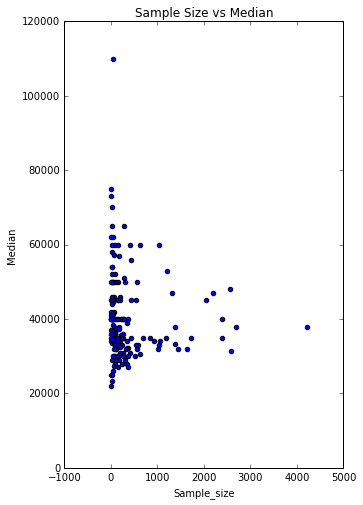

In [12]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs Median', figsize=(5,8))

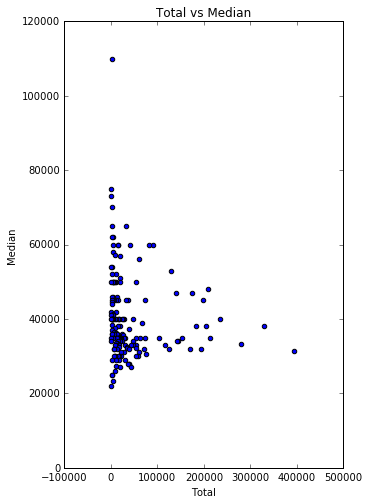

In [19]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Total vs Median', figsize=(5,8))

Looking at this second plot, 'Total vs Median', it appears that more popular majors don't neccessarily make a higher median salary.

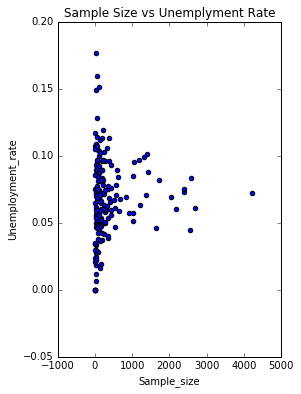

In [14]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs Unemplyment Rate', figsize=(4,6))

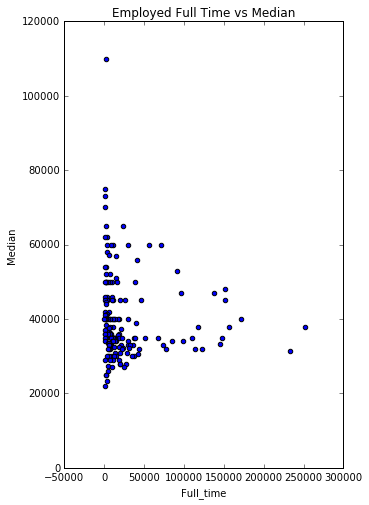

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Employed Full Time vs Median', figsize=(5,8))

There doesn't seem to be a strong link between higher salary, and full-time employment. If anything, the majority of full-time employees average between 20,000 - 40,000 a year.

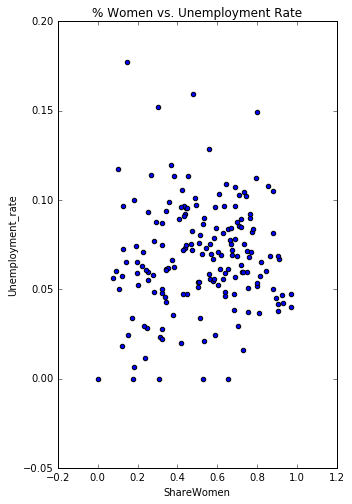

In [16]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='% Women vs. Unemployment Rate', figsize=(5,8))

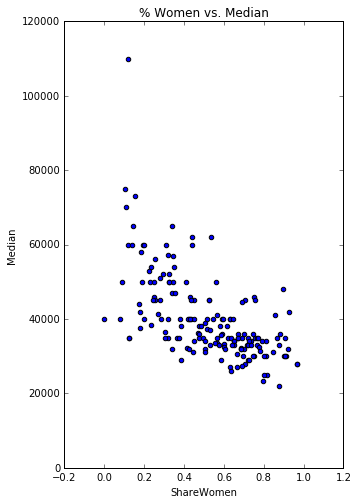

In [20]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='% Women vs. Median', figsize=(5,8))

From this plot, it seems like the higher percentage of women in a major, the lower the median salary is.

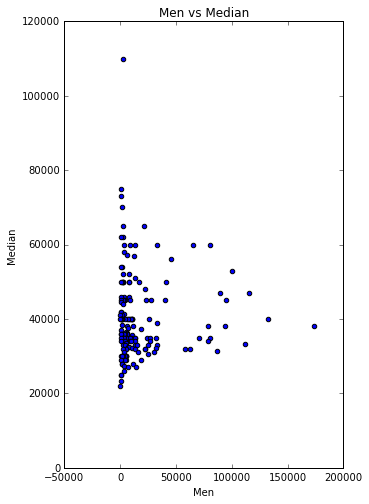

In [17]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median', figsize=(5,8))

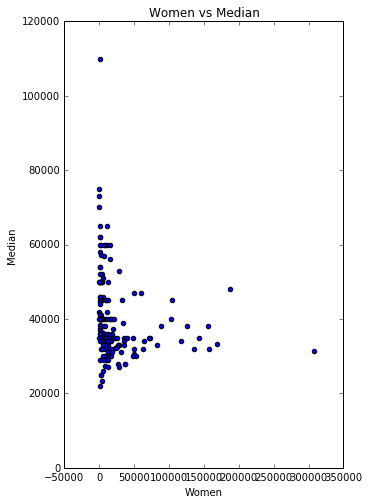

In [18]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs Median', figsize=(5,8))

## Generating Histograms to Examine the Numbers

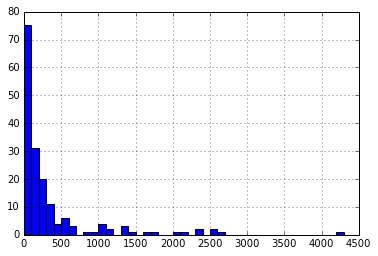

In [29]:
recent_grads['Sample_size'].hist(bins=45, range=(0,4500))

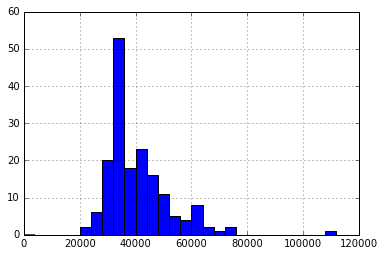

In [37]:
recent_grads['Median'].hist(bins=30, range=(0,120000))

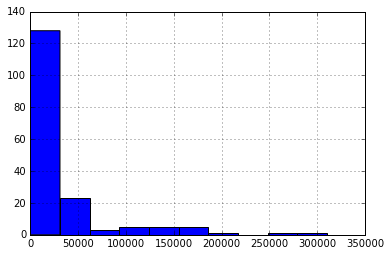

In [50]:
recent_grads['Employed'].hist(bins=10, range=(0,310000))

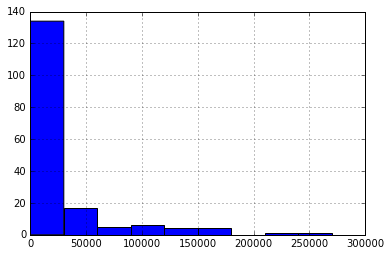

In [54]:
recent_grads['Full_time'].hist(bins=10, range=(0,300000))

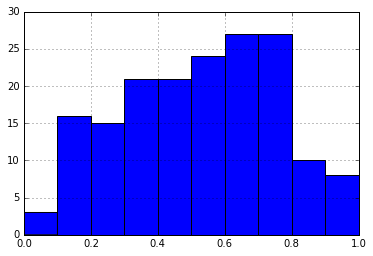

In [70]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1.0))

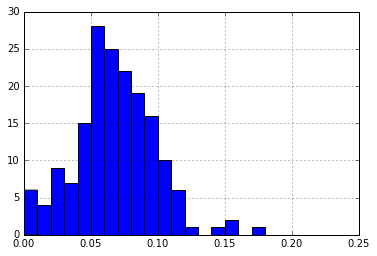

In [68]:
recent_grads['Unemployment_rate'].hist(bins= 20, range=(0, 0.2))

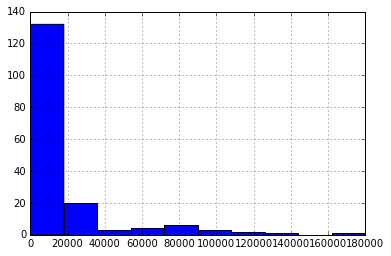

In [74]:
recent_grads['Men'].hist(bins=10, range=(0,180000))

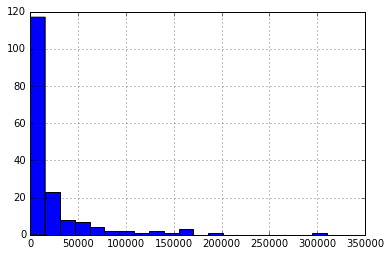

In [77]:
recent_grads['Women'].hist(bins=20, range=(0,310000))

## Scatter Matrix Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de2e47780>,
      dtype=object)

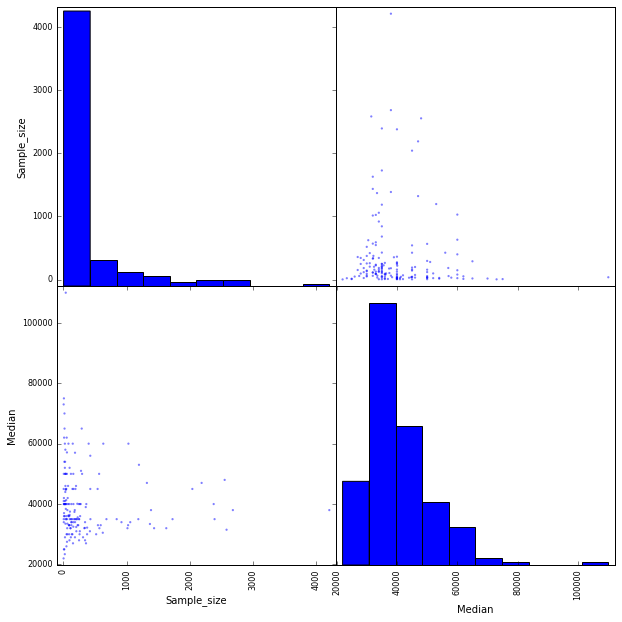

In [80]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

Now for Sample Size, Median, and Unemployment Rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de2d10a20>,
      dtype=object)

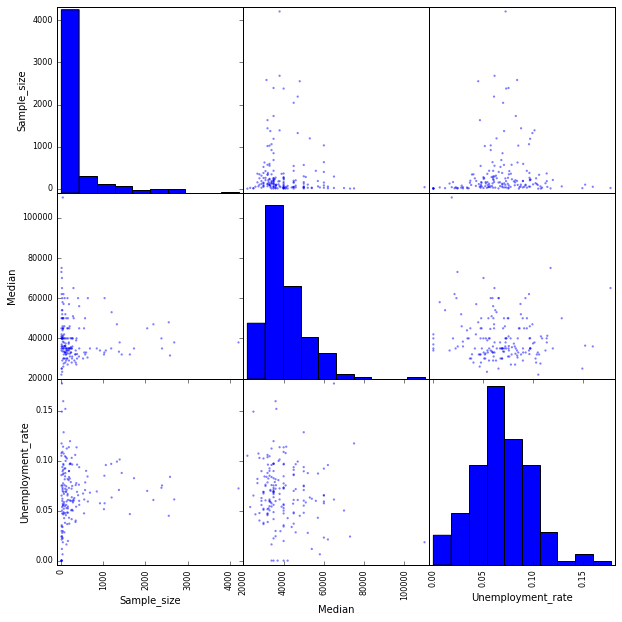

In [81]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Bar Plots

Comparing the percentages of women from the first and last ten rows of the recent grads. This data is sorted by highest median salary. For east of reference, the top and bottom 10 entries will be listed.

In [91]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [92]:
recent_grads.tail(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


### Percentages of Women in Top and Bottom 10 Salaried Majors

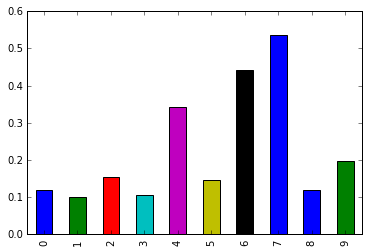

In [86]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

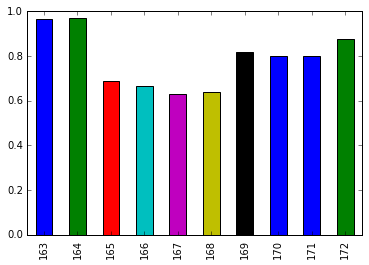

In [87]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

We can see just by inspection, there is a much larger percentage of women in the majors with the lowest median salaries. I.e. in each of the ten lowest median salaried majors, women make up the majority of the work force. Conversely, the top ten salaried majors are predominantly men. Further, 7 out of 10 of these majors are at 80% male ratio, and only 1 out of 10 majors where women are the majority.

### Unemployment Rate of Top and Bottom 10 Salaried Majors

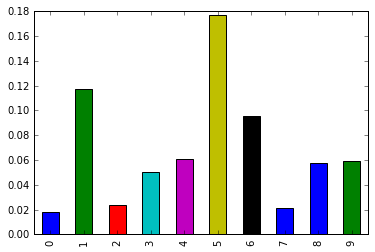

In [88]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

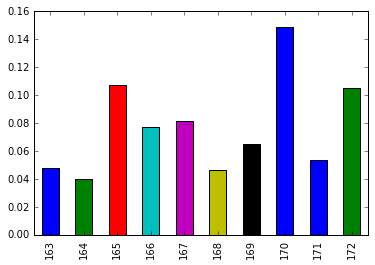

In [89]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

As we can see, of the top 10 salaried majors, the majority of unemployement rate is below 10%, with a large exception for Petroleum Engineering at nearly 20% unemployment rate.

The bottom 10 salaried majors see a slightly higher unemployement rate overall, but no major is over 15% unemployment rate.